In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Background:** A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks. <br>
So, for our analysis, sales is the key metric upon which we will decide weather the promotions were successful or not.

In [2]:
df = pd.read_csv('Marketing-Campaign.csv')

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.rename(columns = {'week':'Week', 'SalesInThousands':'Sales'}, inplace = True)

## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MarketID    548 non-null    int64  
 1   MarketSize  548 non-null    object 
 2   LocationID  548 non-null    int64  
 3   AgeOfStore  548 non-null    int64  
 4   Promotion   548 non-null    int64  
 5   Week        548 non-null    int64  
 6   Sales       548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


* **MarketID:** unique identifier for market
* **MarketSize:** size of market area by sales
* **LocationID:** unique identifier for store location
* **AgeOfStore:** age of store in years
* **Promotion:** one of three promotions that were tested
* **Week:** one of four weeks when the promotions were run
* **Sales:** sales amount, in thousands, for a specific LocationID, Promotion, and week

In [6]:
# Checking for duplicates

len(df[df.duplicated()])

0

In [7]:
# Checking for nulls

df.isna().sum()

MarketID      0
MarketSize    0
LocationID    0
AgeOfStore    0
Promotion     0
Week          0
Sales         0
dtype: int64

### Univariate Analysis

In [8]:
def plot_count(col):
    ax = sns.countplot(x=df[col], palette=sns.color_palette('flare'))
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'"{col}" Categories Count')
    plt.show()

In [9]:
def plot_dist(col):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(x=df[col], kde=True, ax=ax1)
    plt.title(f'Histogram of "{col}"')
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x=df[col], ax=ax2)
    plt.title(f'Boxplot of "{col}"')
    
    plt.show()

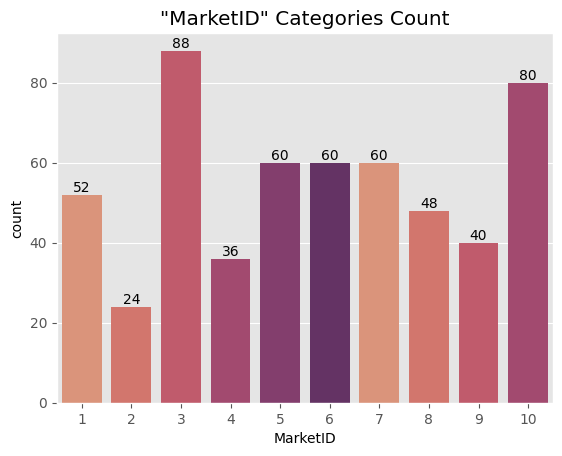

In [10]:
plot_count('MarketID')

Different markets were not selected equal number of times, with market 3 being the most selected, followed by Market 10.

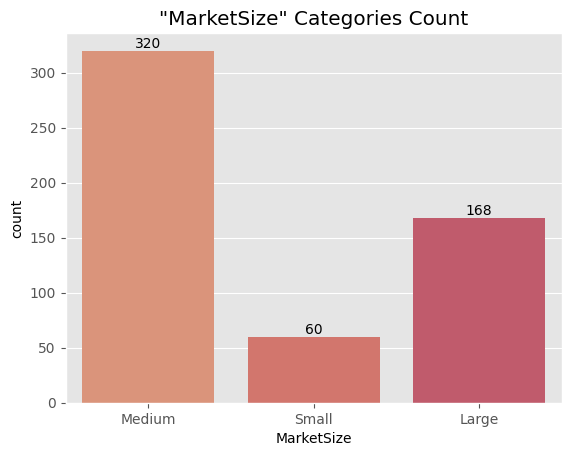

In [11]:
plot_count('MarketSize')

The majority of selected markets were of medium size.

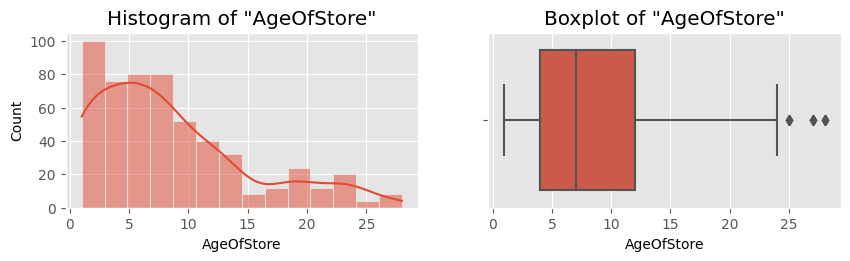

In [12]:
plot_dist('AgeOfStore')

The majority of stores can be considered relatively "young", with a median of 7 years.

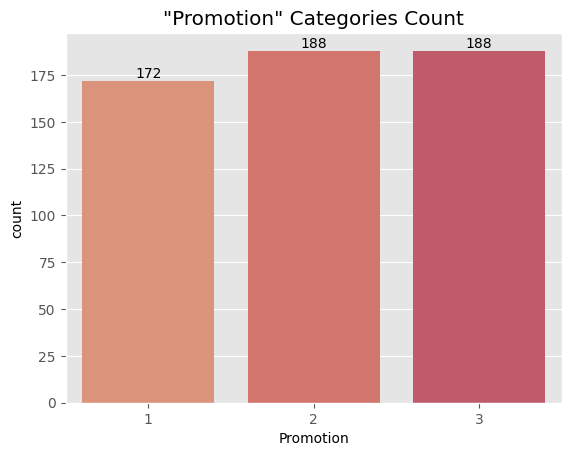

In [13]:
plot_count('Promotion')

The first promotion was applied 8.5% less than the other two promotions.

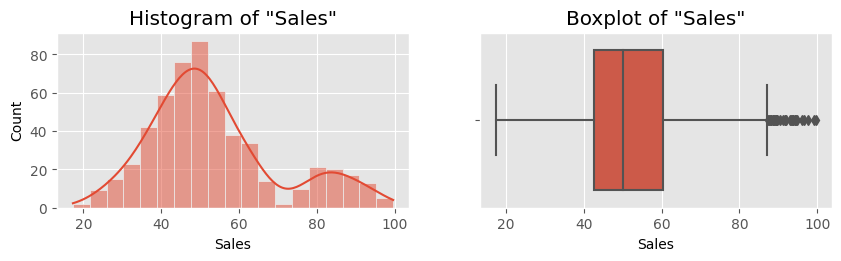

In [14]:
plot_dist('Sales')

The distribution of sales is skewed to the right.

### Bivariate Analysis

In [15]:
def plot_count_cat(col1, col2):
    counts_df = df.groupby(col1)[col2].value_counts(sort=False).unstack().fillna(0)
    colors = ['salmon', 'indianred', 'crimson']
    counts_df.plot(kind='bar', stacked=True, color=colors)
    plt.title(f'"{col2}" Categories According to "{col1}"')
    plt.show()

In [16]:
def plot_count_con(col1, col2):
    sns.barplot(x=df[col1], y=df[col2], palette='Reds')
    plt.title(f'"{col2}" According to "{col1}"')
    plt.show()

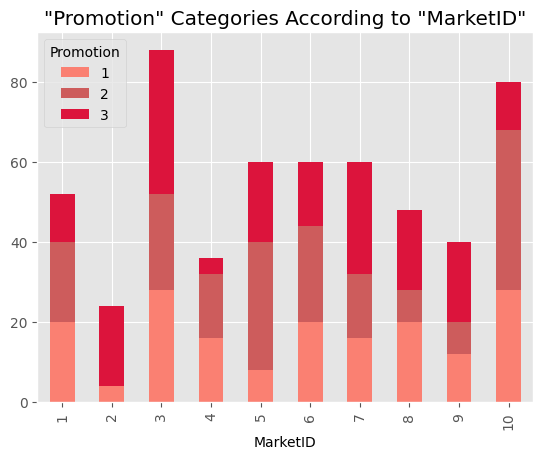

In [17]:
plot_count_cat('MarketID', 'Promotion')

The three promotions were not applied uniformly in all markets. The second promotion was not applied at all at Market 2.

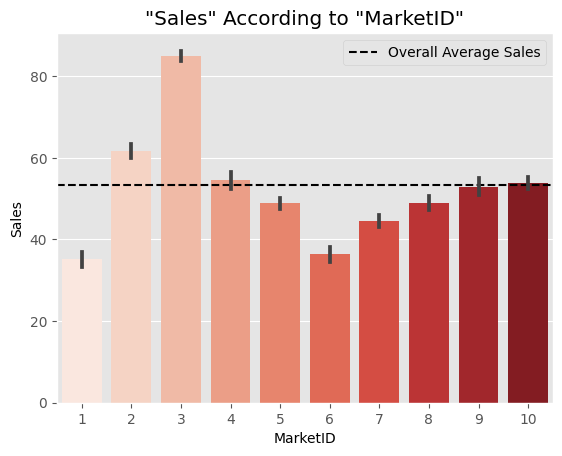

In [18]:
plt.axhline(y=df.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('MarketID', 'Sales')

Market 3 generated the highest amount of sales, followed by market 2. The rest of markets were less than or equal to the overall average.

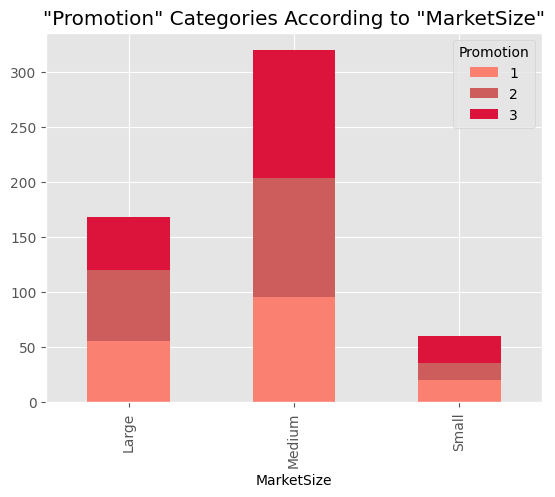

In [19]:
plot_count_cat('MarketSize', 'Promotion')

The three promotions were approximately equally distributed for each market size.

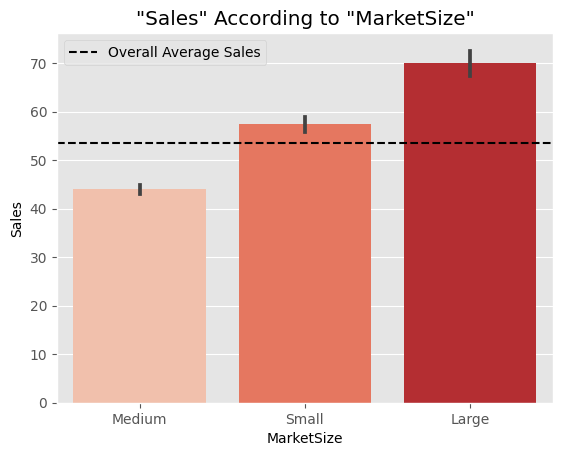

In [20]:
plt.axhline(y=df.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('MarketSize', 'Sales')

Large markets, although not representing the highest number of markets, generated the highest amount of sales. Small markets too scored more than the overall average of sales.

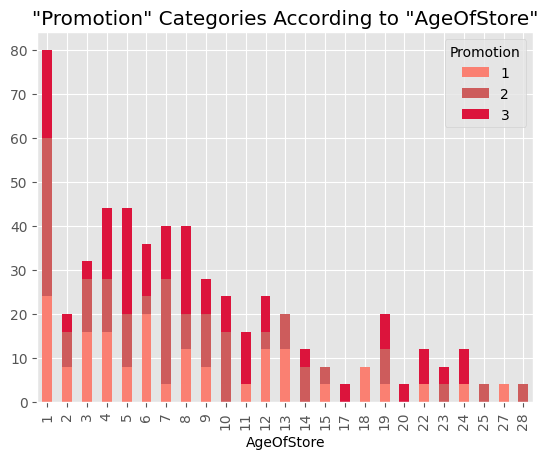

In [21]:
plot_count_cat('AgeOfStore', 'Promotion')

The three promotions were not applied uniformly in stores of different ages. Stores with certain ages witnessed the application of two or only one promotion.

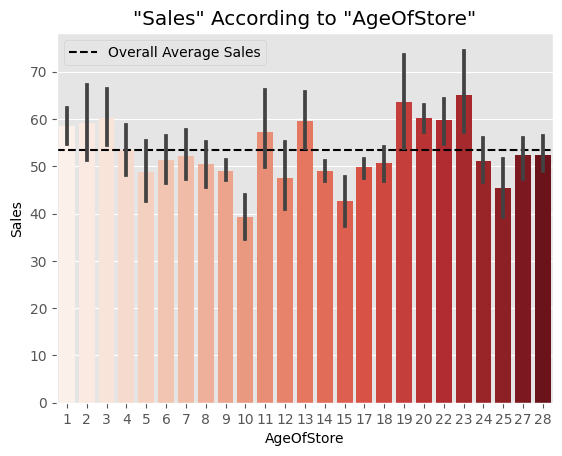

In [22]:
plt.axhline(y=df.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('AgeOfStore', 'Sales')

Although representing a small number of stores, stores with ages of 23 and 19 years generated the highest amounts of sales per store. <br>
We can also see that only 9 stores generated more sales than the overall average.

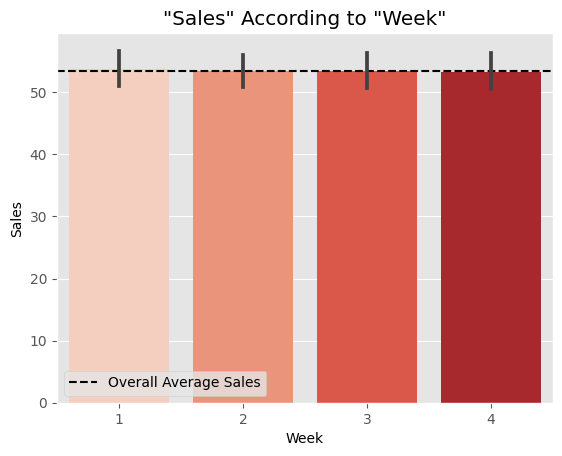

In [23]:
plt.axhline(y=df.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('Week', 'Sales')

Sales were uniformly distributed between all four weeks, approximately equal to the overall average.

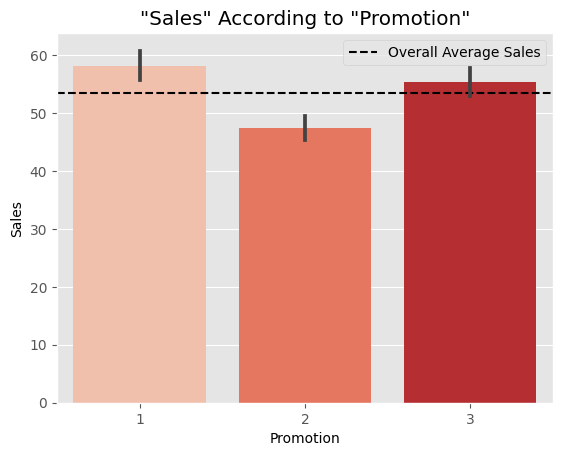

In [24]:
plt.axhline(y=df.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('Promotion', 'Sales')

In [25]:
print('Overall mean of sales:', round(df.Sales.mean(), 2))
print('Mean of sales per promotion:')
print(round(df.groupby('Promotion').Sales.mean(), 2))

Overall mean of sales: 53.47
Mean of sales per promotion:
Promotion
1    58.10
2    47.33
3    55.36
Name: Sales, dtype: float64


It seems that the first promotion generated the highest amount of sales, followed by the third promotion. While the second promotion scored lower than the overall average of sales.

## Hypothesis Testing

We will test the hypothesis of sales amount generated by each promotion that was formulated based on descriptive statistics to see if they hold.

For all the coming hypothesis tests, we will be using a 95% confidence level (α = 0.05). <br>
Also, since the size of the market can greatly affect promotions and sales, we will test all hypothesis on all markets combined and on each of small, medium, and large-sized markets alone.

In [26]:
small_df = df[df.MarketSize == 'Small']
medium_df = df[df.MarketSize == 'Medium']
large_df = df[df.MarketSize == 'Large']

#### Testing normality using Shapiro–Wilk test

* **H0:** The sample comes from a normal distribution.
* **H1:** The sample does not come from a normal distribution.

In [27]:
def shapiro_test(df):
    """
    This function performs Shapiro–Wilk test and prints the test results.
    """
    promotions = df.Promotion.unique()
    for promotion in promotions:
        t_stat, p_value = stats.shapiro(df.loc[df.Promotion == promotion, 'Sales'])
        print(f'Shapiro–Wilk Test Results for Promotion {promotion}')
        print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
        if p_value <= 0.05:
            print('Decision: Reject the Null Hypothesis.')
        else:
            print('Decision: Do Not Reject the Null Hypothesis.')
        print('_' * 20)

In [28]:
print('===Small-Sized Markets===')
shapiro_test(small_df)  # Test for small-sized markets
print('===Medium-Sized Markets===')
shapiro_test(medium_df)  # Test for medium-sized markets
print('===Large-Sized Markets===')
shapiro_test(large_df)  # Test for large-sized markets
print('===All Markets===')
shapiro_test(df)  # Test for all markets

===Small-Sized Markets===
Shapiro–Wilk Test Results for Promotion 1
Test Statistic = 0.94667  |  P-Value = 0.31932
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 3
Test Statistic = 0.98163  |  P-Value = 0.92392
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 2
Test Statistic = 0.9612  |  P-Value = 0.68367
Decision: Do Not Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Shapiro–Wilk Test Results for Promotion 3
Test Statistic = 0.98302  |  P-Value = 0.15069
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 2
Test Statistic = 0.98821  |  P-Value = 0.46654
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 1
Test Statistic = 0.97889  |  P-Value = 0.12412
Decision: Do Not Reject the Null Hypothesis.
____________________
===Large-Sized Mar

We can see that the p-value for all promotions run in small-sized and medium-sized markets is greater than α. Therefore, we fail to reject the null hypothesis and conclude that sales is normally distributed in small-sized and medium-sized markets. <br>
On the other hand, the p-value for all promotions run in large-sized markets in addition to all markets combined, is less than α. Therefore, we reject the null hypothesis and conclude that sales is not normally distributed in large-sized markets and all markets combined.

#### Testing homoscedasticity using Levene test

* **H0:** The variance among groups is equal.
* **H1:** The variance among groups is not equal.

In [29]:
def levene_test(df):
    """
    This function performs Levene test and prints the test results.
    """
    t_stat, p_value = stats.levene(df.loc[df.Promotion == 1, 'Sales'],
                                   df.loc[df.Promotion == 2, 'Sales'],
                                   df.loc[df.Promotion == 3, 'Sales'])
    print('Levene Test Results:')
    print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
    if p_value <= 0.05:
        print('Decision: Reject the Null Hypothesis.')
    else:
        print('Decision: Do Not Reject the Null Hypothesis.')
    print('_' * 20)

In [30]:
print('===Small-Sized Markets===')
levene_test(small_df)
print('===Medium-Sized Markets===')
levene_test(medium_df)
print('===Large-Sized Markets===')
levene_test(large_df)
print('===All Markets===')
levene_test(df)

===Small-Sized Markets===
Levene Test Results:
Test Statistic = 0.06363  |  P-Value = 0.93841
Decision: Do Not Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Levene Test Results:
Test Statistic = 0.85971  |  P-Value = 0.42427
Decision: Do Not Reject the Null Hypothesis.
____________________
===Large-Sized Markets===
Levene Test Results:
Test Statistic = 2.19467  |  P-Value = 0.11464
Decision: Do Not Reject the Null Hypothesis.
____________________
===All Markets===
Levene Test Results:
Test Statistic = 1.26968  |  P-Value = 0.28175
Decision: Do Not Reject the Null Hypothesis.
____________________


For all markets, the p-value is greater than α. Therefore, we fail to reject the null hypothesis and conclude that the varianve of sales among the three promotions is equal.

Since normality can not be assumed for all markets, we will perform Kruskal-Wallis test for all markets to ensure the consistency of results.

#### Testing differences of means using Kruskal-Wallis test

* **H0:** The mean ranks of groups are the same.
* **H1:** The mean ranks of groups are not the same.

In [31]:
def kruskal_test(df):
    """
    This function performs Kruskal-Wallis test and prints the test results.
    """
    t_stat, p_value = stats.kruskal(df.loc[df.Promotion == 1, 'Sales'],
                                    df.loc[df.Promotion == 2, 'Sales'],
                                    df.loc[df.Promotion == 3, 'Sales'])
    print('Kruskal-Wallis Test Results:')
    print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
    if p_value <= 0.05:
        print('Decision: Reject the Null Hypothesis.')
    else:
        print('Decision: Do Not Reject the Null Hypothesis.')
    print('_' * 20)

In [32]:
print('===Small-Sized Markets===')
kruskal_test(small_df)
print('===Medium-Sized Markets===')
kruskal_test(medium_df)
print('===Large-Sized Markets===')
kruskal_test(large_df)
print('===All Markets===')
kruskal_test(df)

===Small-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 21.04656  |  P-Value = 3e-05
Decision: Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 45.66905  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________
===Large-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 41.02961  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________
===All Markets===
Kruskal-Wallis Test Results:
Test Statistic = 53.29475  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________


For all markets, the p-value is less than α. Therefore, we reject the null hypothesis and conclude that there is at least one pair of promotions with statistically significant difference in sales in all market sizes. We need to further investigate the data to find out the certain promotion that resulted in the highest amount of sales. We will use Dunn’s test for post-hoc analysis.

#### Post-Hoc analysis using Dunn’s test

* **H0:** There is no difference in the mean of Sales across promotions.
* **H1:** There is a difference in the mean of Sales across promotions.

In [33]:
def dunn_test(df):
    """
    This function performs Dunn’s test and prints the test results.
    """
    dunn_result = posthoc_dunn([df.loc[df.Promotion == 1, 'Sales'],
                                df.loc[df.Promotion == 2, 'Sales'],
                                df.loc[df.Promotion == 3, 'Sales']],
                               p_adjust='bonferroni')
    print('Dunn’s Test Results:')
    print(round(dunn_result, 5))

In [34]:
print('===Small-Sized Markets===')
dunn_test(small_df)
print('===Medium-Sized Markets===')
dunn_test(medium_df)
print('===Large-Sized Markets===')
dunn_test(large_df)
print('===All Markets===')
dunn_test(df)

===Small-Sized Markets===
Dunn’s Test Results:
         1        2        3
1  1.00000  0.00012  1.00000
2  0.00012  1.00000  0.00017
3  1.00000  0.00017  1.00000
===Medium-Sized Markets===
Dunn’s Test Results:
         1    2        3
1  1.00000  0.0  0.43127
2  0.00000  1.0  0.00000
3  0.43127  0.0  1.00000
===Large-Sized Markets===
Dunn’s Test Results:
     1    2    3
1  1.0  0.0  1.0
2  0.0  1.0  0.0
3  1.0  0.0  1.0
===All Markets===
Dunn’s Test Results:
         1    2        3
1  1.00000  0.0  0.14587
2  0.00000  1.0  0.00000
3  0.14587  0.0  1.00000


For all markets, the p-value between promotions 1 and 2, and promotions 2 and 3 is less than α. Therefore, for these promotions, we reject the null hypothesis and conclude that there is a significant difference in sales. On the other hand, the p-value between promotions 1 and 3 is greater than α. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in sales for this pair. <br>
Thus, **we can expect sales to increase more, in all markets, if we used promotion 1, promotion 3 or both, than if we used promotion 2.**